In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [21]:
data=pd.read_csv("ClimateTrain.csv")
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [24]:
print(data.describe())
print(data.info())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [ ]:
figure = px.line(data, x="date", y="meantemp",title='Mean Temperature Over the Years')
figure.show()


In [32]:
figure = px.line(data, x="date" ,y="humidity",title='Humidity Over the Years')
figure.show()

In [33]:
figure = px.line(data, x="date" ,y="wind_speed",title='Wind Speed Over the Years')
figure.show()

In [35]:
figure = px.scatter(data_frame = data, x="humidity",y="meantemp",size="meantemp",trendline="ols",title = "Relationship Between Temperature and Humidity")
figure.show()

In [36]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d') #change format of data
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())


        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


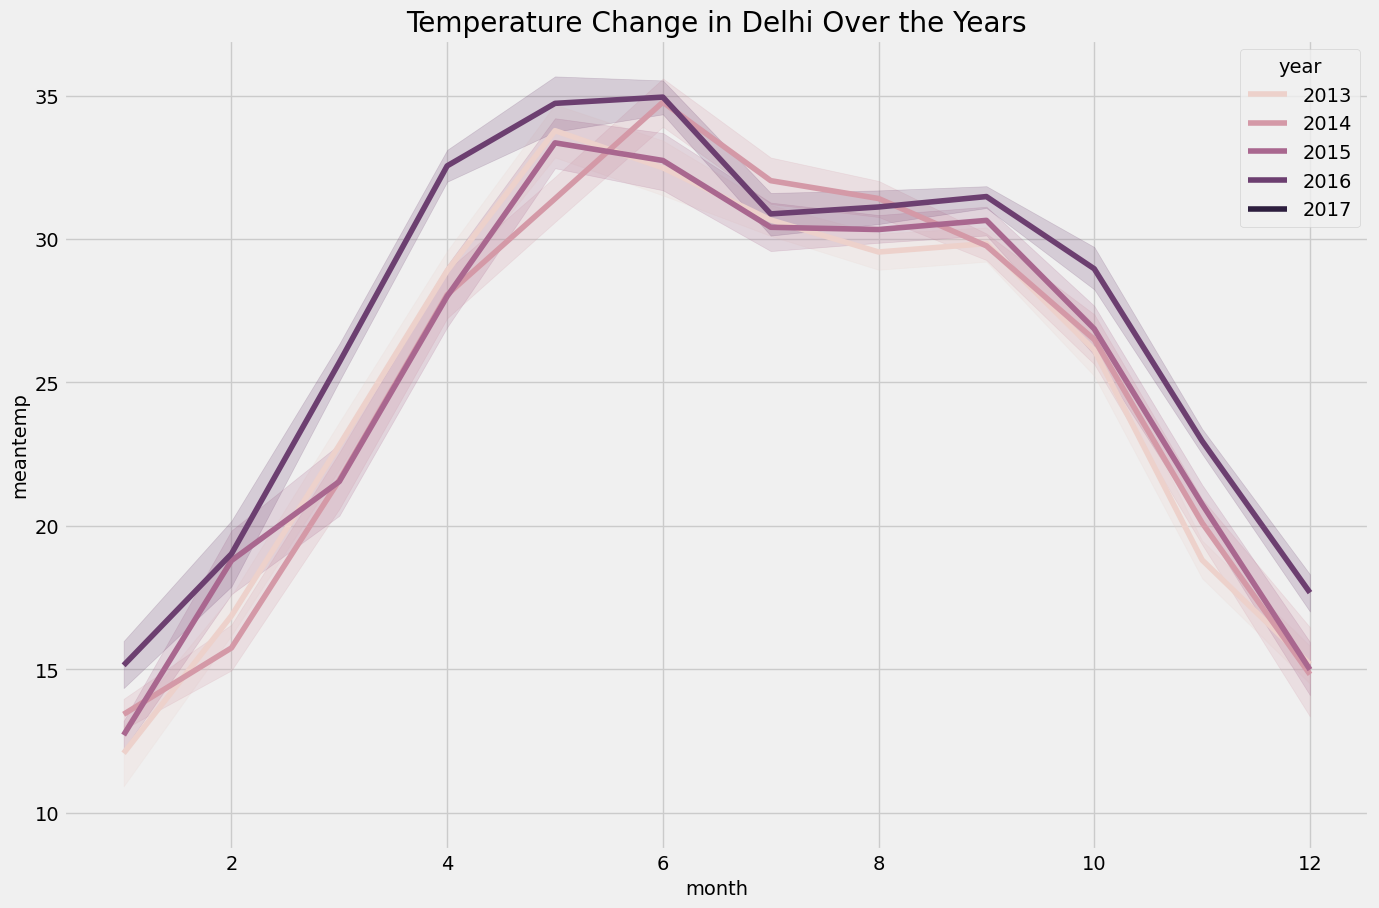

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [58]:
forecast_data= data.rename(columns = {"date": "ds","meantemp":"y"}) 
print(forecast_data)


             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model,predictions)

19:15:17 - cmdstanpy - INFO - Chain [1] start processing
19:15:17 - cmdstanpy - INFO - Chain [1] done processing
19:15:17 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
19:15:17 - cmdstanpy - INFO - Chain [1] start processing
19:15:18 - cmdstanpy - INFO - Chain [1] done processing
19:15:18 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=98534 data file=C:\Users\Lenovo\AppData\Local\Temp\tmp7xas2qq2\6yk8fadt.json init=C:\Users\Lenovo\AppData\Local\Temp\tmp7xas2qq2\c44jfdlq.json output file=C:\Users\Lenovo\AppData\Local\Temp\tmp7xas2qq2\prophet_modelpmf91nxo\prophet_model-20230312191517.csv method=optimize algorithm=newton iter=10000' failed: 